In [18]:
!pip install -r ../code/requirements.txt

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [19]:
!conda install -c conda-forge librosa -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::seaborn-base==0.11.1=pyhd8ed1ab_1
  - conda-forge/noarch::nbclassic==0.2.6=pyhd8ed1ab_0
  - conda-forge/linux-64::blaze==0.11.3=py36_0
  - conda-forge/linux-64::matplotlib==3.3.4=py36h5fab9bb_0
  - defaults/linux-64::_anaconda_depends==5.1.0=py36_2
  - conda-forge/noarch::jupyterlab==3.0.9=pyhd8ed1ab_0
  - conda-forge/noarch::python-language-server==0.36.2=pyhd8ed1ab_0
  - conda-forge/noarch::jupyterlab_server==2.3.0=pyhd8ed1ab_0
  - conda-forge/noarch::pyls-black==0.4.6=pyh9f0ad1d_0
  - conda-forge/linux-64::scikit-image==0.16.2=py36hb3f55d8_0
  - conda-forge/noarch::black==20.8b1=py_1
  - conda-forge/linux-64::anyio==2.1.0=py36h5fab9bb_0
  - conda-forge/linux-64::jupyter_server==1.4.1=py36h5fab9bb_0
  - conda-forge/linux-64::bokeh==2.2.3=py36h5fab9bb_0
  - conda-forge/noarch::numpydoc==1.1.0=py_1
  - conda-forg

In [1]:
pwd

'/home/ec2-user/SageMaker/deep.audio/notebooks'

# Get Data

We will use the UrbanSound8K dataset to train our network. It is available for free here https://urbansounddataset.weebly.com/ and contains 10 audio classes with over 8000 audio samples. Once you have downloaded the compressed dataset, extract it to your current working directory. There is a csv files that contain metadata of all the sound wave metadata.

Alternatively, the dataset is also available on Kaggle https://www.kaggle.com/chrisfilo/urbansound8k/download.

The following are the class labels:
```
0 = airconditioner 
1 = carhorn
2 = childrenplaying 
3 = dogbark
4 = drilling
5 = engineidling 
6 = gunshot
7 = jackhammer
8 = siren
9 = street_music
```

The expected directory structure is as follows with respect to this notebook:

```
../data/UrbanSound8K/
|-- fold1
|   |-- 1.wav
|-- fold2
|   |-- 2.wav
...
|   
`-- UrbanSound8K.csv

```

Let's take a look at a sample file to ensure dataset is downloaded to the correct location.

In [8]:
!mkdir -p ../data/

In [7]:
!wget http://d7u5xi5v17h03.cloudfront.net/urbansound8k.zip

--2021-09-03 17:38:28--  http://d7u5xi5v17h03.cloudfront.net/urbansound8k.zip
Resolving d7u5xi5v17h03.cloudfront.net (d7u5xi5v17h03.cloudfront.net)... 13.249.32.29, 13.249.32.209, 13.249.32.192, ...
Connecting to d7u5xi5v17h03.cloudfront.net (d7u5xi5v17h03.cloudfront.net)|13.249.32.29|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6026232524 (5.6G) [application/zip]
Saving to: ‘urbansound8k.zip’

urbansound8k.zip    100%[===================>]   5.61G  43.4MB/s    in 1m 55s  

2021-09-03 17:40:22 (50.2 MB/s) - ‘urbansound8k.zip’ saved [6026232524/6026232524]



In [9]:
!unzip urbansound8k.zip -d ../data/

Archive:  urbansound8k.zip
  inflating: ../data/UrbanSound8K.csv  
  inflating: ../data/fold1/101415-3-0-2.wav  
  inflating: ../data/fold1/101415-3-0-3.wav  
  inflating: ../data/fold1/101415-3-0-8.wav  
  inflating: ../data/fold1/102106-3-0-0.wav  
  inflating: ../data/fold1/102305-6-0-0.wav  
  inflating: ../data/fold1/102842-3-0-1.wav  
  inflating: ../data/fold1/102842-3-1-0.wav  
  inflating: ../data/fold1/102842-3-1-5.wav  
  inflating: ../data/fold1/102842-3-1-6.wav  
  inflating: ../data/fold1/103074-7-0-0.wav  
  inflating: ../data/fold1/103074-7-0-1.wav  
  inflating: ../data/fold1/103074-7-0-2.wav  
  inflating: ../data/fold1/103074-7-1-0.wav  
  inflating: ../data/fold1/103074-7-1-1.wav  
  inflating: ../data/fold1/103074-7-1-2.wav  
  inflating: ../data/fold1/103074-7-1-3.wav  
  inflating: ../data/fold1/103074-7-1-4.wav  
  inflating: ../data/fold1/103074-7-1-5.wav  
  inflating: ../data/fold1/103074-7-1-6.wav  
  inflating: ../data/fold1/103074-7-2-0.wav  
  inflating: 

In [10]:
!rm urbansound8k.zip

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import ../code/audioutil.py

SyntaxError: invalid syntax (<ipython-input-26-13f9fc7a4802>, line 4)

In [13]:
df = pd.read_csv('../data/UrbanSound8K.csv')

In [27]:
df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

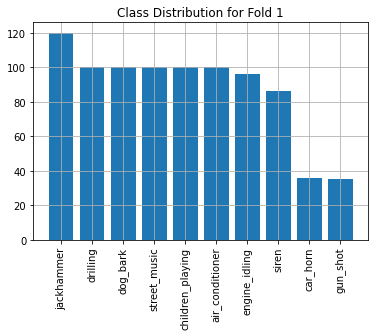

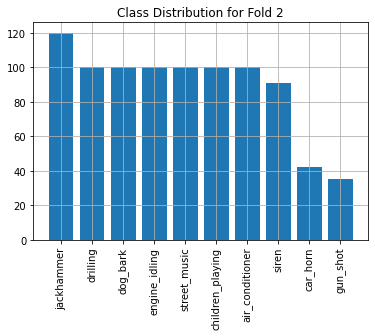

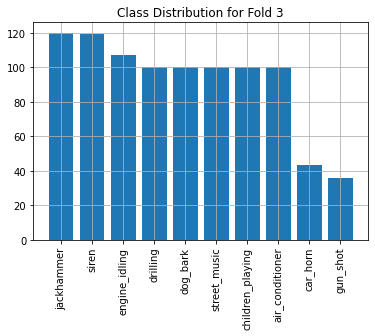

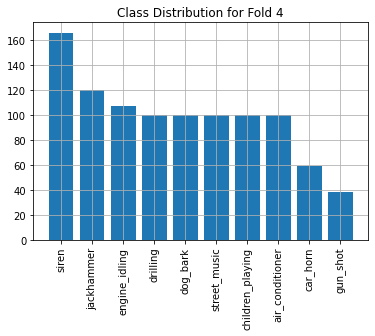

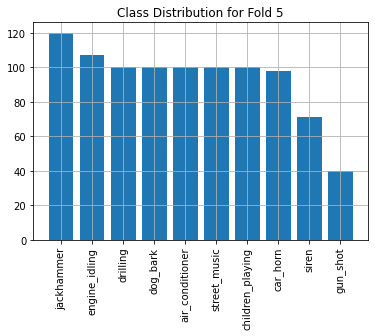

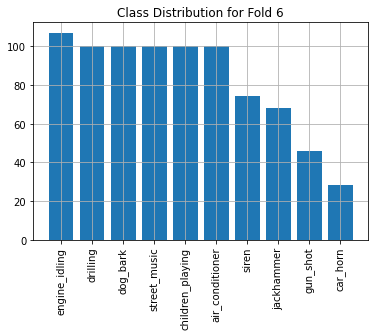

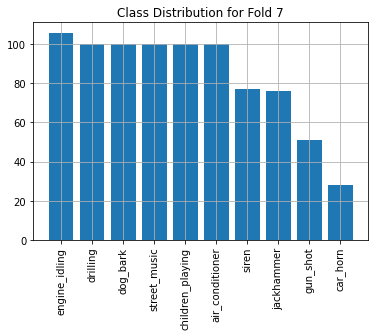

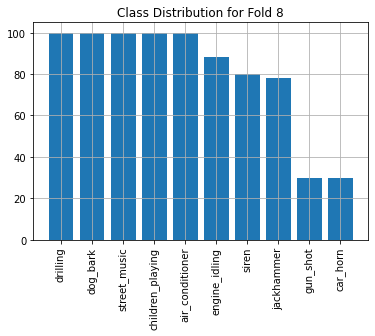

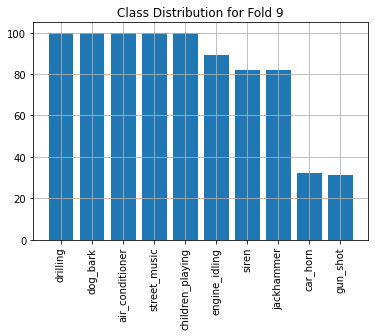

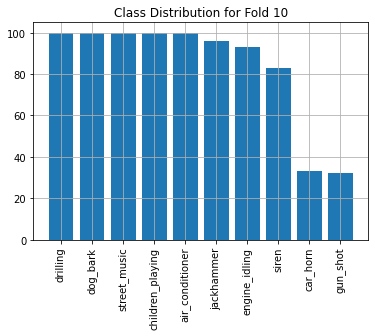

In [15]:
for i in range(1,11):
    a = df[df['fold']==i]['class'].value_counts()
    plt.figure()
    plt.bar(a.index,a.values)
    plt.grid()
    plt.xticks(rotation=90);
    plt.title(f'Class Distribution for Fold {i}')

In [6]:
fname = '../data/fold5/100263-2-0-36.wav'

In [7]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)


1.9.0+cu102
0.9.0


In [8]:
metadata = torchaudio.info(fname)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=176400, num_channels=2, bits_per_sample=16, encoding=PCM_S)


## Load Data

In [9]:
import sys
sys.path.append('../code/')

In [10]:
from audioutil import *

In [11]:
import torch

Sample Rate: 44100
Shape: (2, 176400)
Dtype: torch.float32
 - Max:      0.019
 - Min:     -0.020
 - Mean:    -0.000
 - Std Dev:  0.004

tensor([[-0.0011, -0.0012, -0.0007,  ...,  0.0067,  0.0062,  0.0049],
        [-0.0023, -0.0021, -0.0020,  ...,  0.0015,  0.0029,  0.0044]])



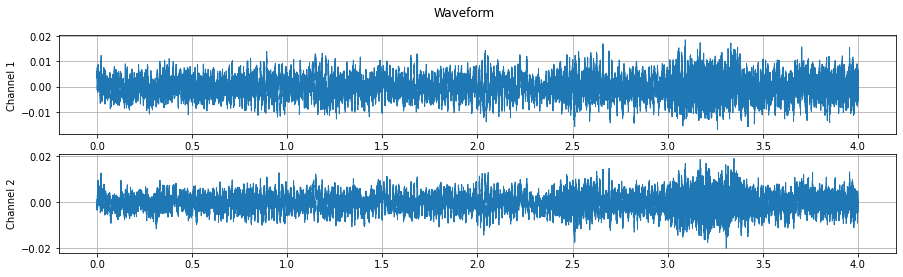

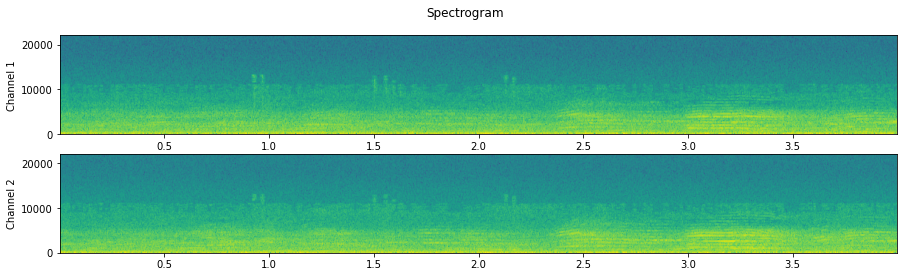

In [12]:
waveform, sample_rate = torchaudio.load(fname)

print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)

## Spectrogram

Shape: (2, 513, 345)
Dtype: torch.float32
 - Max:      6.050
 - Min:      0.000
 - Mean:     0.006
 - Std Dev:  0.077

tensor([[[2.8966e+00, 1.7050e+00, 1.7185e+00,  ..., 1.4118e-02,
          3.5825e-01, 2.6087e-02],
         [4.4307e-01, 8.5560e-01, 1.5212e+00,  ..., 1.1318e+00,
          3.8675e-01, 7.8652e-02],
         [2.9654e-02, 1.3992e-01, 1.7727e+00,  ..., 2.5885e+00,
          7.3668e-01, 1.5180e-01],
         ...,
         [9.2936e-08, 1.3790e-08, 1.1533e-07,  ..., 5.8305e-08,
          5.2175e-08, 6.3270e-08],
         [4.5139e-08, 1.2080e-07, 1.4628e-07,  ..., 6.7003e-08,
          4.1685e-08, 1.8564e-07],
         [8.1005e-11, 1.0696e-07, 6.8406e-08,  ..., 4.3926e-10,
          4.1797e-10, 3.2258e-07]],

        [[5.4078e-01, 2.9654e+00, 3.2925e+00,  ..., 1.6017e-01,
          3.8145e-01, 2.9746e-03],
         [7.2167e-02, 1.1837e+00, 2.0825e+00,  ..., 1.2386e+00,
          4.6971e-01, 3.1045e-02],
         [5.9613e-01, 6.2400e-02, 1.7189e+00,  ..., 1.8443e+00,
         

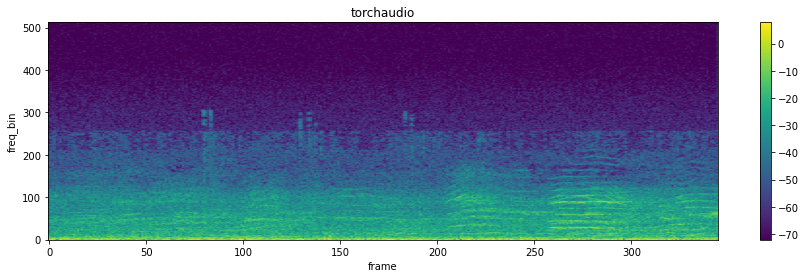

In [13]:
n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec = spectrogram(waveform)

print_stats(spec)
plot_spectrogram(spec[0], title='torchaudio')

## Mel Spectrogram

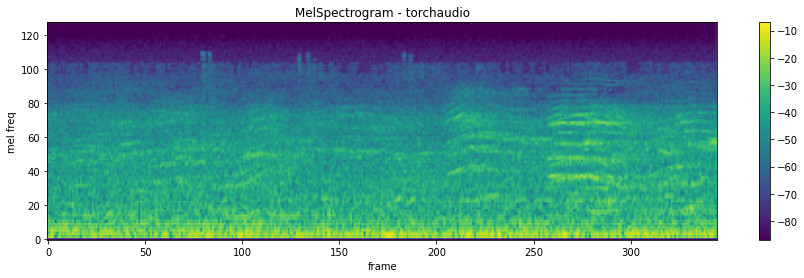

In [16]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(waveform)
plot_spectrogram(
    melspec[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')


## MFCC

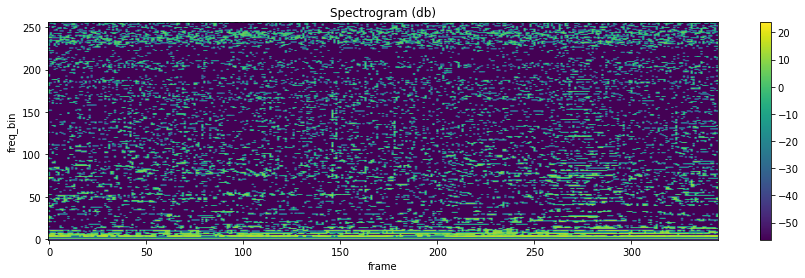

In [18]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

mfcc = mfcc_transform(waveform)

plot_spectrogram(mfcc[0])

## Pitch

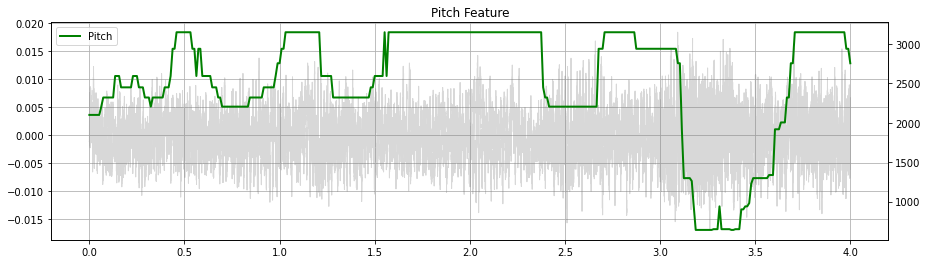

In [19]:
pitch = F.detect_pitch_frequency(waveform, sample_rate)
plot_pitch(waveform, sample_rate, pitch)
play_audio(waveform, sample_rate)

## Kaldi Pitch

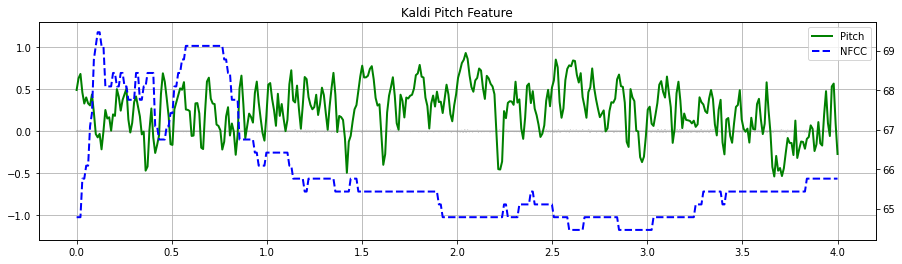

In [21]:
pitch_feature = F.compute_kaldi_pitch(waveform, sample_rate)
pitch, nfcc = pitch_feature[..., 0], pitch_feature[..., 1]

plot_kaldi_pitch(waveform, sample_rate, pitch, nfcc)
play_audio(waveform, sample_rate)